<a href="https://colab.research.google.com/github/Ajita3/AICourseworkTopicClassification/blob/Ajita3-patch-1/Intent_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installation
!pip install datasets scikit-learn matplotlib seaborn wordcloud


In [3]:
# importing the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)

from wordcloud import WordCloud


In [ ]:
!pip install datasets


In [4]:
# loading the datasets

from datasets import load_dataset

dataset = load_dataset("tanaos/synthetic-intent-classifier-dataset-v1")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/11489 [00:00<?, ? examples/s]

In [5]:
import pandas as pd

df = pd.DataFrame(dataset["train"])
df.head()     #top 5 rows


,text,labels
0,"Hello, how are you?",0
1,"I'm doing great, thanks!",3
2,Can you help me with something?,9
3,Thanks for your assistance!,2
4,I'm not happy with the service.,8


In [6]:
print("Total samples:", len(df))



Total samples: 11489


In [7]:
print("Total samples:", len(df))
print("Unique intent labels:", df["labels"].nunique())
df["labels"].value_counts()


Total samples: 11489
Unique intent labels: 12


,count
labels,
9,1098
4,1061
3,1060
7,1041
0,986
2,968
5,963
1,893
6,886


In [8]:
intent_labels = [
    "greeting",
    "farewell",
    "thank_you",
    "affirmation",
    "negation",
    "small_talk",
    "bot_capabilities",
    "feedback_positive",
    "feedback_negative",
    "clarification",
    "suggestion",
    "language_change"
]

df["intent"] = df["labels"].apply(lambda x: intent_labels[x])
df.head()


,text,labels,intent
0,"Hello, how are you?",0,greeting
1,"I'm doing great, thanks!",3,affirmation
2,Can you help me with something?,9,clarification
3,Thanks for your assistance!,2,thank_you
4,I'm not happy with the service.,8,feedback_negative


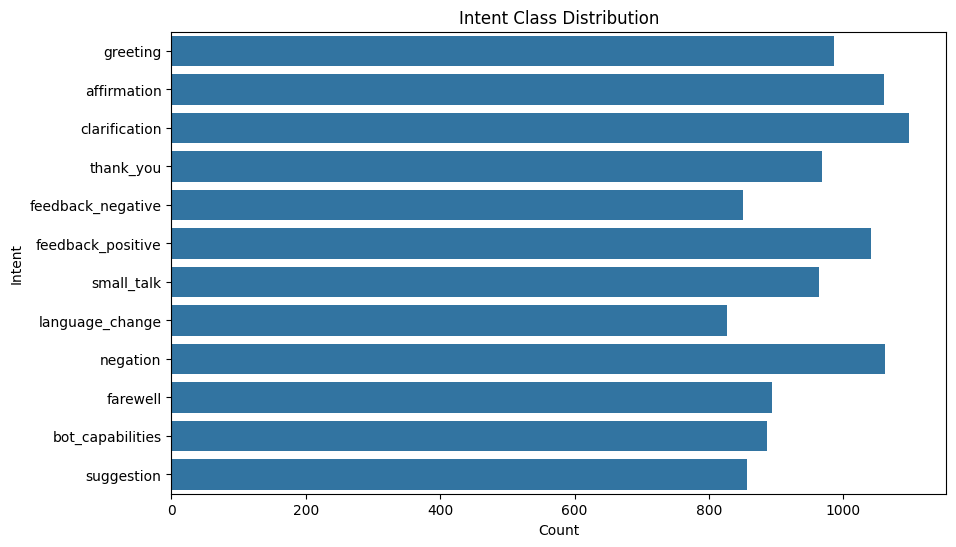

In [9]:
#class distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y=df["intent"])
plt.title("Intent Class Distribution")
plt.xlabel("Count")
plt.ylabel("Intent")
plt.show()


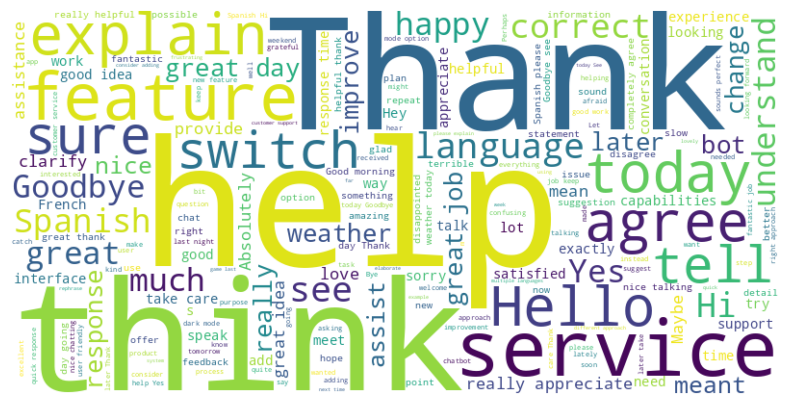

In [ ]:
#word cloud

from wordcloud import WordCloud

all_text = " ".join(df["text"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [10]:
#train test split

from sklearn.model_selection import train_test_split

X = df["text"]
y = df["labels"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 9191
Testing samples: 2298


In [11]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Train Shape:", X_train_tfidf.shape)


TF-IDF Train Shape: (9191, 5000)


In [ ]:
# training logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

lr_preds = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


Logistic Regression Accuracy: 0.8942558746736292
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       197
           1       0.97      0.96      0.96       179
           2       0.88      0.94      0.91       194
           3       0.90      0.81      0.85       212
           4       0.91      0.91      0.91       212
           5       0.86      0.83      0.85       193
           6       0.80      0.90      0.85       177
           7       0.86      0.83      0.85       208
           8       0.87      0.89      0.88       170
           9       0.93      0.87      0.90       220
          10       0.84      0.91      0.87       171
          11       0.95      0.96      0.96       165

    accuracy                           0.89      2298
   macro avg       0.90      0.90      0.90      2298
weighted avg       0.90      0.89      0.89      2298



In [ ]:
# training svm

from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

svm_preds = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.897302001740644
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       197
           1       0.96      0.98      0.97       179
           2       0.88      0.93      0.90       194
           3       0.90      0.80      0.85       212
           4       0.91      0.92      0.92       212
           5       0.86      0.83      0.84       193
           6       0.83      0.90      0.86       177
           7       0.85      0.86      0.85       208
           8       0.89      0.88      0.88       170
           9       0.92      0.87      0.90       220
          10       0.87      0.89      0.88       171
          11       0.95      0.98      0.96       165

    accuracy                           0.90      2298
   macro avg       0.90      0.90      0.90      2298
weighted avg       0.90      0.90      0.90      2298



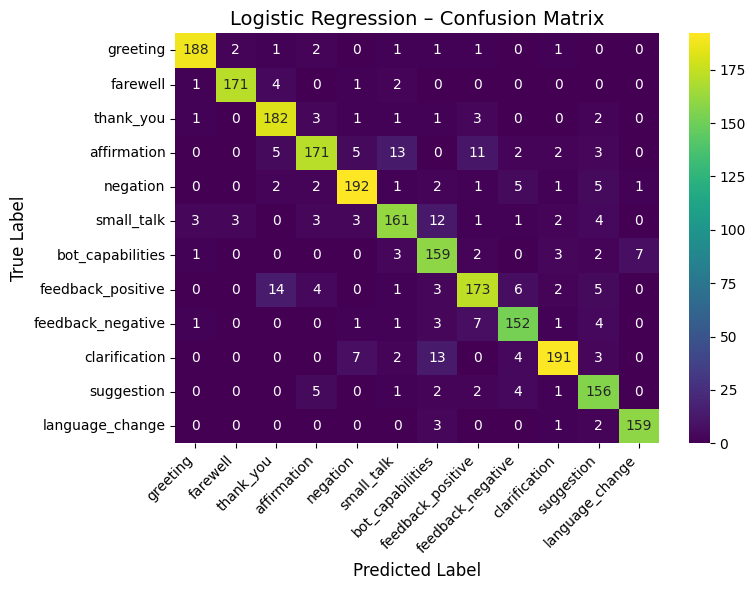

In [ ]:
#confusion matrix - Logistic Regression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_lr = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="viridis",
    xticklabels=intent_labels,
    yticklabels=intent_labels
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Logistic Regression – Confusion Matrix", fontsize=14)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


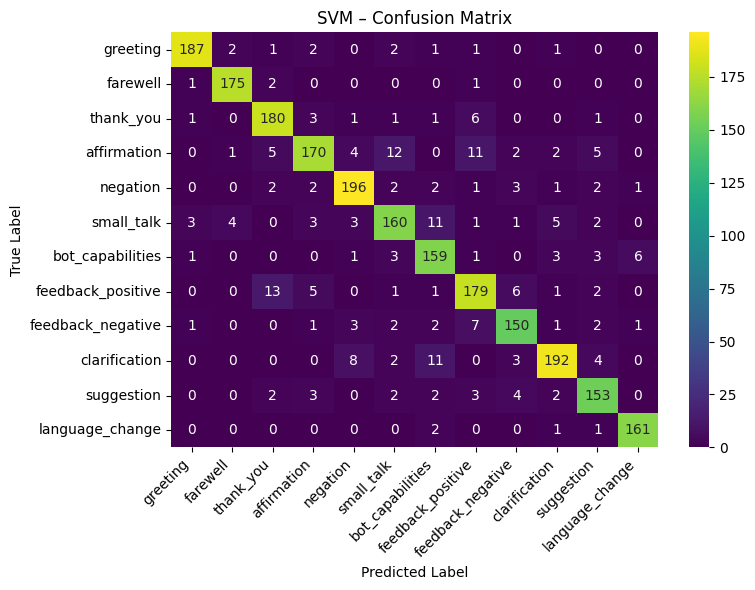

In [ ]:
# confusion matrix - svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="viridis",
    xticklabels=intent_labels,
    yticklabels=intent_labels
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM – Confusion Matrix")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



In [ ]:
# sample text
sample_texts = [
    "Thank you so much!",
    "Can you explain that again?",
    "I'm not satisfied with the service.",
    "Can we switch to Spanish?"
]

sample_tfidf = tfidf.transform(sample_texts)

lr_sample_preds = lr.predict(sample_tfidf)
svm_sample_preds = svm.predict(sample_tfidf)

for i, text in enumerate(sample_texts):
    print(f"Text: {text}")
    print(f"LR Prediction: {intent_labels[lr_sample_preds[i]]}")
    print(f"SVM Prediction: {intent_labels[svm_sample_preds[i]]}")
    print("-" * 40)


Text: Thank you so much!
LR Prediction: thank_you
SVM Prediction: thank_you
----------------------------------------
Text: Can you explain that again?
LR Prediction: clarification
SVM Prediction: clarification
----------------------------------------
Text: I'm not satisfied with the service.
LR Prediction: feedback_negative
SVM Prediction: feedback_negative
----------------------------------------
Text: Can we switch to Spanish?
LR Prediction: language_change
SVM Prediction: language_change
----------------------------------------


In [ ]:
#accuracy
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, lr_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM"],
    "Accuracy": [lr_accuracy, svm_accuracy]
})

results

,Model,Accuracy
0,Logistic Regression,0.894256
1,SVM,0.897302


In [ ]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.8942558746736292


In [ ]:

import pandas as pd

accuracy_table = pd.DataFrame({
    "Model": ["Logistic Regression", "Support Vector Machine"],
    "Accuracy (%)": [89.43, 89.73]
})

accuracy_table


,Model,Accuracy (%)
0,Logistic Regression,89.43
1,Support Vector Machine,89.73


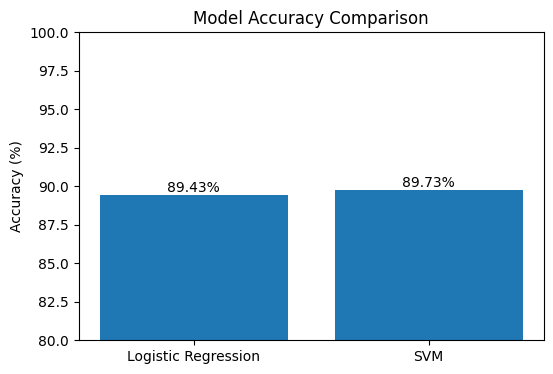

In [ ]:
#accuracy comparison

import matplotlib.pyplot as plt

models = ["Logistic Regression", "SVM"]
accuracies = [89.43, 89.73]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(80, 100)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.2, f"{v}%", ha='center')

plt.show()


In [ ]:
#precision, recall, f1-score, support

from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(
    y_test, svm_preds,
    target_names=intent_labels,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()
df_report.head()


,precision,recall,f1-score,support
greeting,0.963918,0.949239,0.956522,197.0
farewell,0.961538,0.977654,0.969529,179.0
thank_you,0.878049,0.927835,0.902256,194.0
affirmation,0.899471,0.801887,0.847880,212.0
negation,0.907407,0.924528,0.915888,212.0


In [ ]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.897302001740644


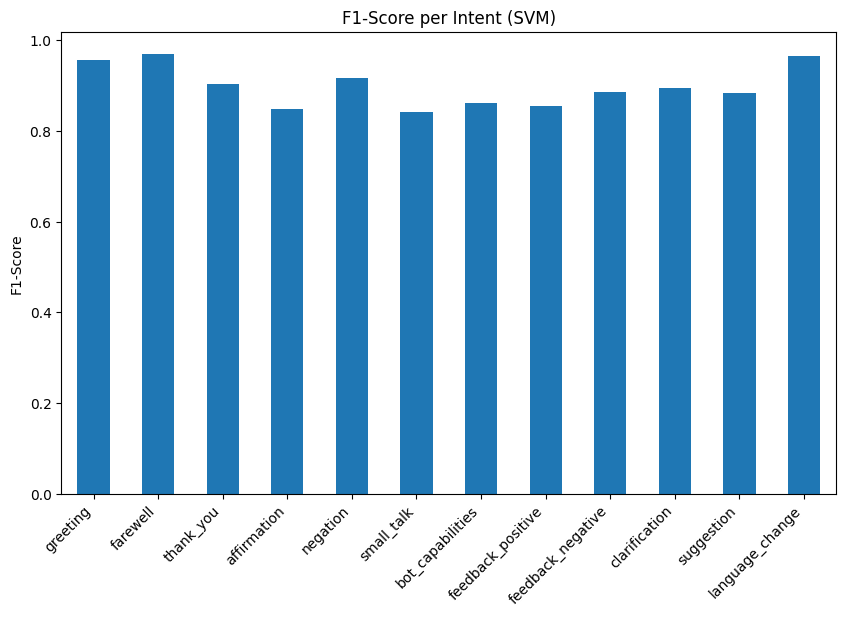

In [ ]:
#f1 Score svm
plt.figure(figsize=(10,6))
df_report.loc[intent_labels, "f1-score"].plot(kind="bar")
plt.title("F1-Score per Intent (SVM)")
plt.ylabel("F1-Score")
plt.xticks(rotation=45, ha="right")
plt.show()


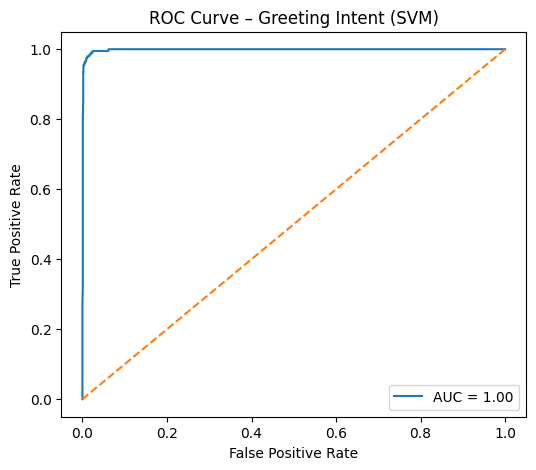

In [ ]:
#roc curve svm
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=range(12))
svm_scores = svm.decision_function(X_test_tfidf)

fpr, tpr, _ = roc_curve(y_test_bin[:,0], svm_scores[:,0])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Greeting Intent (SVM)")
plt.legend()
plt.show()


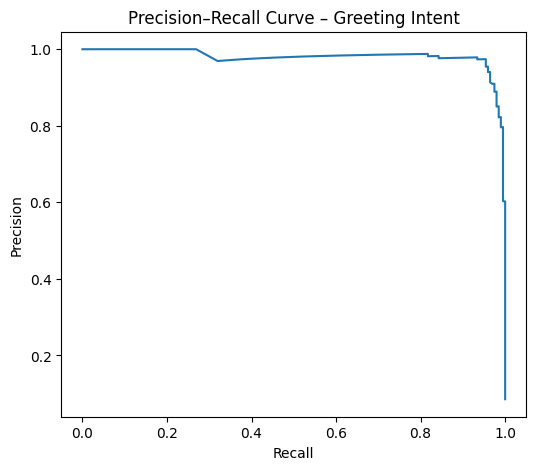

In [ ]:
#precision recall curve

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(
    y_test_bin[:,0], svm_scores[:,0]
)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Greeting Intent")
plt.show()


In [ ]:
feature_names = tfidf.get_feature_names_out()
coef = svm.coef_[0]

top_features = pd.DataFrame({
    "word": feature_names,
    "weight": coef
}).sort_values(by="weight", ascending=False).head(10)

top_features


,word,weight
1807,hello,4.265033
1682,greetings,2.477729
3156,morning,2.408758
2008,hi,2.247313
1969,hey,1.846758
1539,good evening,1.675938
2014,hi day,1.603134
2015,hi doing,1.583337
1972,hey day,1.536149
3066,meet,1.454657


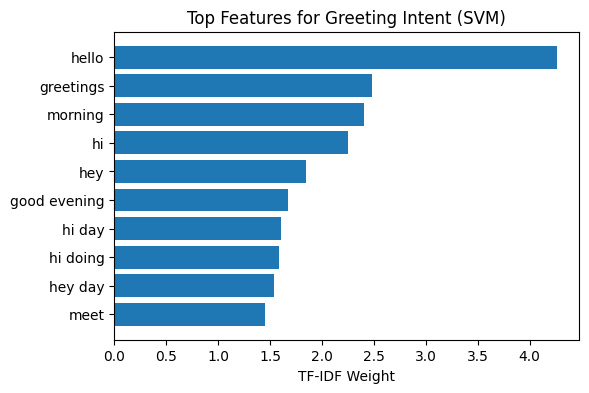

In [ ]:
plt.figure(figsize=(6,4))
plt.barh(top_features["word"], top_features["weight"])
plt.xlabel("TF-IDF Weight")
plt.title("Top Features for Greeting Intent (SVM)")
plt.gca().invert_yaxis()
plt.show()


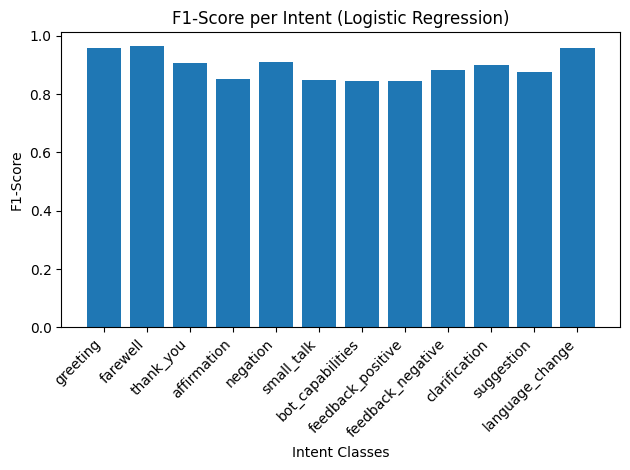

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(
    y_test,
    lr_preds,
    target_names=intent_labels,
    output_dict=True
)

# Extract F1-scores
f1_scores = [report[label]['f1-score'] for label in intent_labels]

# Plot bar chart
plt.figure()
plt.bar(intent_labels, f1_scores)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Intent Classes")
plt.ylabel("F1-Score")
plt.title("F1-Score per Intent (Logistic Regression)")
plt.tight_layout()
plt.show()
